### (Machine Learning – Python): Predicting Loan Approval Using KNN and Decision Trees

### <span style="color:#6f70d1">Understanding the Problem Statement</span>

The business case for this project is to develop a model that can predict loan approval for individuals. By using previous data on loan decisions made by the company, the goal is to create a machine learning model that can automate and simplify the loan approval process, reducing risk and improving decision-making efficiency.
In this project, we will develop a model to predict who is eligible for a loan in order to reduce the risk associated with the decision process and to modify the typical loan approval process into a much easier one. Moreover, we will make use of previous data of loan decisions made by the company and with the help of various data mining techniques, we will develop a loan approval decision predicting model which can draw decisions for each individual based on the information provided by them.

The steps involved in solving this problem include:

- Data exploration and preprocessing: Analyze the dataset, handle missing values, convert categorical variables into numeric form, and normalize or standardize numerical variables if required.
- Splitting the data: Divide the dataset into features (X) and the target variable (y), and further split it into training and test sets to assess model performance.
- Model training: Build and train a KNN classifier and a Decision Tree classifier on the training data.
- Model evaluation: Make predictions using the trained models on the test set and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score.
- Model comparison: Compare the performance of the KNN and Decision Tree models to determine which one performs better for loan approval prediction

### <span style="color:#6f70d1">K-Nearest Neighbor</span>

K-Nearest Neighbors is a supervised machine learning algorithm used for both classification and regression tasks. It operates based on the principle that similar instances tend to have similar labels. KNN is a non-parametric algorithm, meaning it does not make assumptions about the underlying data distribution.
In KNN, the "K" refers to the number of nearest neighbors used to make predictions. Given a new instance, KNN finds the K closest instances in the training data based on a distance metric (e.g., Euclidean distance) and assigns the class label (for classification) or calculates the average value (for regression) based on the labels of the K neighbors.
KNN's simplicity and flexibility make it easy to understand and implement. It can handle both numerical and categorical features, and it can adapt to complex decision boundaries. However, KNN can be sensitive to the choice of distance metric, may require careful preprocessing of the data, and can be computationally expensive for large datasets.

### <span style="color:#6f70d1">Decision Trees</span>

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It builds a model in the form of a tree structure by partitioning the feature space based on feature values. The tree is constructed by recursively splitting the data based on the features to create branches that represent different decision paths.
Decision Trees make decisions by evaluating feature values at each internal node and following the corresponding branch until reaching a leaf node, which represents the predicted class or value. The splits in the tree are determined based on criteria that maximize the homogeneity or purity of the resulting subsets. Common criteria include Gini impurity and entropy.
Decision Trees have several advantages, such as being interpretable, handling both numerical and categorical features, and capturing non-linear relationships. However, they can be prone to overfitting and may not generalize well to unseen data if the tree is too complex.

### The data
Data selection is very important for every machine learning problem. 
The dataset chosen for this project is located here <a href="https://github.com/prasertcbs/basic-dataset/blob/master/Loan-Approval-Prediction.csv">here</a>



The dataset is in CSV format and contains the following columns:

- Loan_ID: Identifier for the loan.
- Gender: Gender of the applicant. (Male/Female)
- Married: Marital status of the applicant. (Yes/No)
- Dependents: Number of people dependent on the applicant. (0/1/2/3+)
- Education: Educational qualification of the applicant. (Graduate/Not Graduate)
- Self_Employed: Whether the applicant is self-employed or not. (Yes/No)
- ApplicantIncome: Income of the applicant.
- CoapplicantIncome: Income of the co-applicant.
- LoanAmount: The amount of loan requested.
- Loan_Amount_Term: The term period of the loan in months.
- Credit_History: Whether the applicant has a credit history or not. (1/0)
- Property_Area: Area category of the property. (Urban/Rural/Semiurban)
- Loan_Status: Whether the loan was approved or not. (Y/N)

Before building our machine learning models, we need to analyze this data.
We need to do some basic data exploratory analysis like checking the data types, looking for missing values, visualizing the distribution of the data, etc. 

### Step 1: Data exploration, cleaning and Preprocessing

In [14]:
#import the libraries that we will need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import urllib.request
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

### Getting the data

In [2]:
# URL of the dataset
url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Loan-Approval-Prediction.csv"

# Location where you want to store the dataset
output_file = "Loan-Approval-Prediction.csv" 

# Download the file from `url` and save it locally under `output_file`:
urllib.request.urlretrieve(url, output_file)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(output_file)

# Display the DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Select only the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Remove 'Loan_ID' from the list
categorical_columns = categorical_columns.drop('Loan_ID')

# Loop over each categorical column
for col in categorical_columns:
    # Print the column name
    print(col)
    
    # Print the unique values in this column
    print(df[col].unique())
    print("\n")  # Add a newline for readability

Gender
['Male' 'Female' nan]


Married
['No' 'Yes' nan]


Dependents
['0' '1' '2' '3+' nan]


Education
['Graduate' 'Not Graduate']


Self_Employed
['No' 'Yes' nan]


Property_Area
['Urban' 'Rural' 'Semiurban']


Loan_Status
['Y' 'N']




It is important to see the unique values from our categorical data. 

- Gender: This column has two unique values ('Male', 'Female') and missing values (represented by nan in Python).
- Married: This column has two unique values ('No', 'Yes') and missing values.
- Dependents: This column seems to represent the number of dependents for each individual. It has four unique values ('0', '1', '2', '3+') and missing values. The '3+' value may represent three or more dependents.
- Education: This column has two unique values ('Graduate', 'Not Graduate'), which presumably represent whether the individual has graduated from an educational institution.
- Self_Employed: This column has two unique values ('No', 'Yes') and missing values, indicating whether the individual is self-employed.
- Property_Area: This column has three unique values ('Urban', 'Rural', 'Semiurban'), representing the type of area where the property is located.
- Loan_Status: This is presumably the target variable for our machine learning model. It has two unique values ('Y', 'N'), representing whether a loan was approved ('Y') or not ('N').

### Data exploration

We will do some exploration to find patterns in our data

In [4]:
# Filter the dataset for rejected loan applications
rejected_loans = df[df['Loan_Status'] == 'N']

# Calculate the total number of rejected loans
total_rejections = len(rejected_loans)

# Group the rejected loans by education and count the number of rejections for each category
rejections_by_education = rejected_loans.groupby('Education').size()

# Calculate the percentage of rejections for each education category
percentage_rejections_by_education = (rejections_by_education / total_rejections) * 100

# Print the results
for education, percentage in percentage_rejections_by_education.items():
    print("Percentage of rejections for {}: {:.2f}%".format(education, percentage))

Percentage of rejections for Graduate: 72.92%
Percentage of rejections for Not Graduate: 27.08%


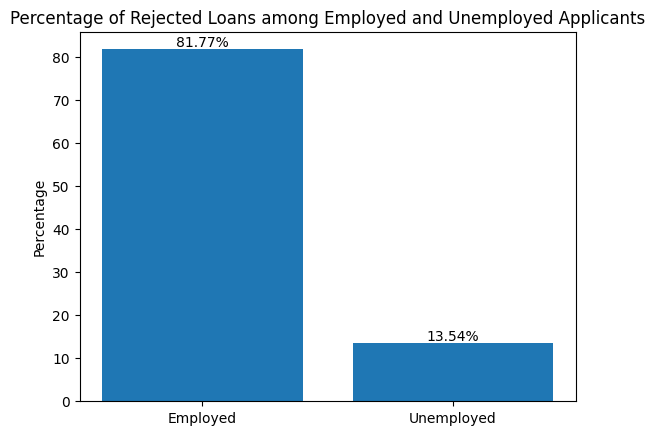

In [5]:
# Filter the dataset for approved and rejected loan applications
approved_applications = df[df['Loan_Status'] == 'Y']
rejected_applications = df[df['Loan_Status'] == 'N']

# Calculate the percentage of rejected applications among the employed
employed_rejected = rejected_applications[rejected_applications['Self_Employed'] == 'No']
percentage_employed_rejected = (len(employed_rejected) / len(rejected_applications)) * 100

# Calculate the percentage of rejected applications among the unemployed
unemployed_rejected = rejected_applications[rejected_applications['Self_Employed'] == 'Yes']
percentage_unemployed_rejected = (len(unemployed_rejected) / len(rejected_applications)) * 100

# Plot the results
labels = ['Employed', 'Unemployed']
percentages = [percentage_employed_rejected, percentage_unemployed_rejected]

plt.bar(labels, percentages)
plt.ylabel('Percentage')
plt.title('Percentage of Rejected Loans among Employed and Unemployed Applicants')

# Add the percentages as text labels on the bars
for i, perc in enumerate(percentages):
    plt.text(i, perc, f'{perc:.2f}%', ha='center', va='bottom')

plt.show()

#### Loan applications per gender

In [6]:
# Calculate the total number of loans
total_loans = len(df)

# Filter the loans made by women
loans_women = df[df['Gender'] == 'Female']
num_loans_women = len(loans_women)
percentage_loans_women = (num_loans_women / total_loans) * 100

# Filter the loans made by men
loans_men = df[df['Gender'] == 'Male']
num_loans_men = len(loans_men)
percentage_loans_men = (num_loans_men / total_loans) * 100

# Print the results
print("Percentage of loans made by women: {:.2f}%".format(percentage_loans_women))
print("Percentage of loans made by men: {:.2f}%".format(percentage_loans_men))

Percentage of loans made by women: 18.24%
Percentage of loans made by men: 79.64%


#### Rejected loans per gender

In [7]:
# Filter the dataset for rejected loan applications
rejected_loans = df[df['Loan_Status'] == 'N']

# Calculate the total number of rejected loans
total_rejected = len(rejected_loans)

# Filter the rejected loans for women
rejected_women = rejected_loans[rejected_loans['Gender'] == 'Female']
num_rejected_women = len(rejected_women)
percentage_rejected_women = (num_rejected_women / total_rejected) * 100

# Filter the rejected loans for men
rejected_men = rejected_loans[rejected_loans['Gender'] == 'Male']
num_rejected_men = len(rejected_men)
percentage_rejected_men = (num_rejected_men / total_rejected) * 100

# Print the results
print("Percentage of rejected loans for women: {:.2f}%".format(percentage_rejected_women))
print("Percentage of rejected loans for men: {:.2f}%".format(percentage_rejected_men))

Percentage of rejected loans for women: 19.27%
Percentage of rejected loans for men: 78.12%


In [8]:
# Create a copy of the dataset and drop missing values
df_cleaned = df.dropna().copy()

# Drop the 'Loan_ID' column
df_cleaned = df_cleaned.drop('Loan_ID', axis=1)

# Convert categorical variables to numeric variables using one-hot encoding
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Normalize/Standardize numerical variables
scaler = StandardScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_cleaned_encoded[numerical_columns] = scaler.fit_transform(df_cleaned_encoded[numerical_columns])

# Split the data into features and target variable
X = df_cleaned_encoded.drop('Loan_Status', axis=1)  # Exclude the target variable 'Loan_Status'
y = df_cleaned_encoded['Loan_Status']  # Use the target variable 'Loan_Status'

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
df_cleaned_encoded

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,-0.137970,-0.027952,-0.208089,0.275542,1.0,N,True,True,True,False,False,False,False,False,False
2,-0.417536,-0.604633,-0.979001,0.275542,1.0,Y,True,True,False,False,False,False,True,False,True
3,-0.491180,0.297100,-0.307562,0.275542,1.0,Y,True,True,False,False,False,True,False,False,True
4,0.112280,-0.604633,-0.046446,0.275542,1.0,Y,True,False,False,False,False,False,False,False,True
5,0.009319,0.999978,1.520245,0.275542,1.0,Y,True,True,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.435196,-0.604633,-0.916831,0.275542,1.0,Y,False,False,False,False,False,False,False,False,False
610,-0.222210,-0.604633,-1.302286,-2.487549,1.0,Y,True,True,False,False,True,False,False,False,False
611,0.478206,-0.512854,1.346168,0.275542,1.0,Y,True,True,True,False,False,False,False,False,True
612,0.391846,-0.604633,0.525520,0.275542,1.0,Y,True,True,False,True,False,False,False,False,True


### Step 2: Training and Evaluating the Models
Next, we'll train two models, one using the K-Nearest Neighbors (KNN) algorithm and the other using a decision tree.

In [10]:
# Create a KNN classifier and train it
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions with the KNN classifier
knn_predictions = knn.predict(X_test)

In [11]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [12]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [15]:
# Predict using the KNN model
knn_predictions = knn_model.predict(X_test)

# Print the confusion matrix for the KNN model
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix - KNN Model:")
print(knn_cm)

# Print the classification report for the KNN model
knn_report = classification_report(y_test, knn_predictions)
print("Classification Report - KNN Model:")
print(knn_report)

# Predict using the Decision Tree model
dt_predictions = dt_model.predict(X_test)

# Print the confusion matrix for the Decision Tree model
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix - Decision Tree Model:")
print(dt_cm)

# Print the classification report for the Decision Tree model
dt_report = classification_report(y_test, dt_predictions)
print("Classification Report - Decision Tree Model:")
print(dt_report)

Confusion Matrix - KNN Model:
[[ 7 21]
 [ 1 67]]
Classification Report - KNN Model:
              precision    recall  f1-score   support

           N       0.88      0.25      0.39        28
           Y       0.76      0.99      0.86        68

    accuracy                           0.77        96
   macro avg       0.82      0.62      0.62        96
weighted avg       0.79      0.77      0.72        96

Confusion Matrix - Decision Tree Model:
[[16 12]
 [13 55]]
Classification Report - Decision Tree Model:
              precision    recall  f1-score   support

           N       0.55      0.57      0.56        28
           Y       0.82      0.81      0.81        68

    accuracy                           0.74        96
   macro avg       0.69      0.69      0.69        96
weighted avg       0.74      0.74      0.74        96



In [16]:
dt_predictions

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

After preprocessing the data and training the models, both KNN and Decision Tree were evaluated using accuracy, precision, recall, and F1 score. The performance of the models can be compared based on these metrics to choose the best one for deployment. In general, the choice between the two models would depend on their performance on the metrics that are most important for the bank. For example, if the bank wants to minimize false negatives (i.e., incorrectly rejecting loans that should have been approved), they should choose the model with the highest recall. If they want to minimize false positives (i.e., incorrectly approving loans that should have been rejected), they should choose the model with the highest precision. The F1 score provides a balance between precision and recall, while the accuracy gives an overall measure of the model's performance.



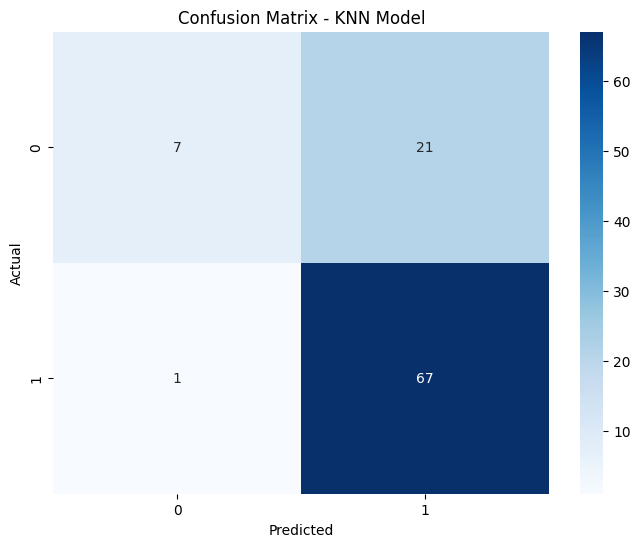

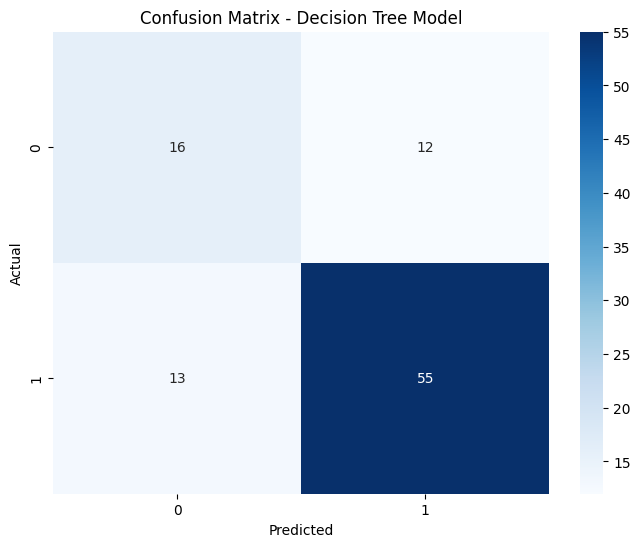

In [17]:
# Plot the confusion matrix for the KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the confusion matrix for the Decision Tree model
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Decision Tree Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
import os

# Create the "models" directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

In [19]:
import pickle

# Save the trained models using pickle
with open('models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

with open('models/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [20]:
# Load the saved models using pickle
with open('models/knn_model.pkl', 'rb') as f:
    loaded_knn_model = pickle.load(f)

with open('models/decision_tree_model.pkl', 'rb') as f:
    loaded_dt_model = pickle.load(f)

### Make predictions
With our loaded models we can perform predictions in new data. It would be interesting if we test our model in new dataframes or deploy it with a framework like Flask.

In [21]:
# Make predictions using the loaded models
knn_predictions = loaded_knn_model.predict(X_test)
dt_predictions = loaded_dt_model.predict(X_test)

# Print the predictions
print("KNN Predictions:", knn_predictions)
print("Decision Tree Predictions:", dt_predictions)

KNN Predictions: ['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y']
Decision Tree Predictions: ['Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y']


### Important Features for Loan Approval Prediction

#### Decision Trees
To analyze the important features for loan approval prediction, we can examine the feature importances provided by the models. Decision Trees can provide insights into feature importance based on how often they are used for splitting the data.

In [22]:
# Get feature importances from the loaded Decision Tree model
feature_importances = loaded_dt_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                    Feature  Importance
0           ApplicantIncome    0.274717
4            Credit_History    0.273433
2                LoanAmount    0.210412
1         CoapplicantIncome    0.085769
3          Loan_Amount_Term    0.049265
8              Dependents_2    0.029134
12  Property_Area_Semiurban    0.020439
6               Married_Yes    0.019798
7              Dependents_1    0.012121
13      Property_Area_Urban    0.012121
9             Dependents_3+    0.008059
11        Self_Employed_Yes    0.004732
5               Gender_Male    0.000000
10   Education_Not Graduate    0.000000


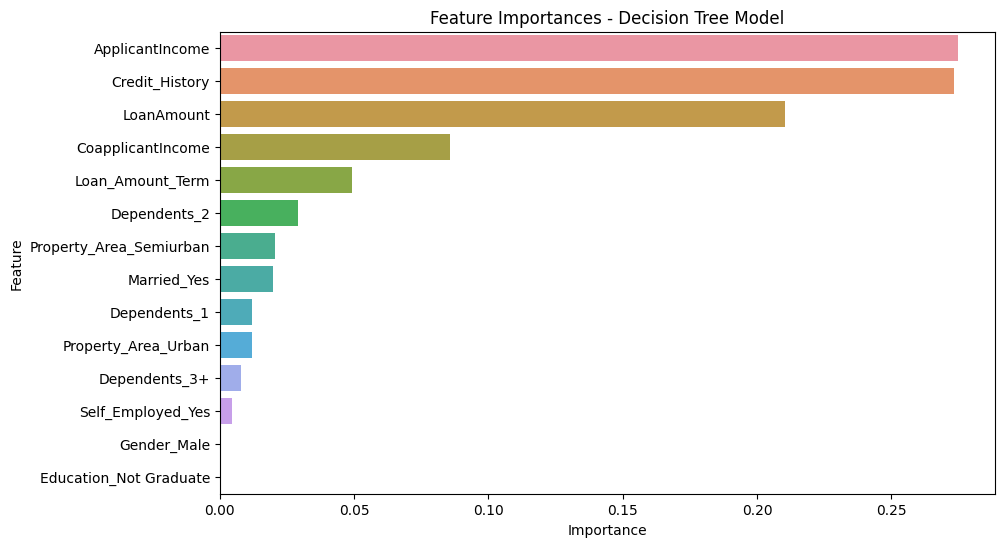

In [23]:
# Plot the feature importances for the Decision Tree model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances - Decision Tree Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#### KNN

In the case of KNN, we can use a different approach to understand the importance of features. We can calculate the mean value of each feature for the approved and rejected loan samples. The difference in mean values can indicate the relative importance of a feature in loan approval prediction. Here's the modified code snippet to calculate feature importance for the KNN model:

In [24]:
# Convert the target variable to numeric format
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Create a DataFrame combining the features and numeric target variable
df_combined = pd.concat([X, pd.Series(y_numeric, name='Loan_Status')], axis=1)

# Calculate the mean values for each feature based on loan status
mean_approved = df_combined[df_combined['Loan_Status'] == 1].mean()
mean_rejected = df_combined[df_combined['Loan_Status'] == 0].mean()

# Calculate the difference in mean values between approved and rejected loans
feature_importances = mean_approved - mean_rejected

# Sort the feature importances in descending order
feature_importance_df = pd.DataFrame({'Feature': feature_importances.index, 'Importance': feature_importances.values})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Remove the target variable from feature importances
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Loan_Status']

# Print the feature importances
print("Feature Importance (KNN):")
print(feature_importance_df)

Feature Importance (KNN):
                    Feature Importance
2                LoanAmount   0.175705
1         CoapplicantIncome   0.154365
12  Property_Area_Semiurban   0.097709
0           ApplicantIncome   0.068277
3          Loan_Amount_Term   0.041977
6               Married_Yes    0.03914
8              Dependents_2   0.032745
9             Dependents_3+   0.024805
13      Property_Area_Urban   0.020589
7              Dependents_1   0.015881
5               Gender_Male   0.000878
10   Education_Not Graduate  -0.017638
11        Self_Employed_Yes  -0.025473
4            Credit_History  -0.036399


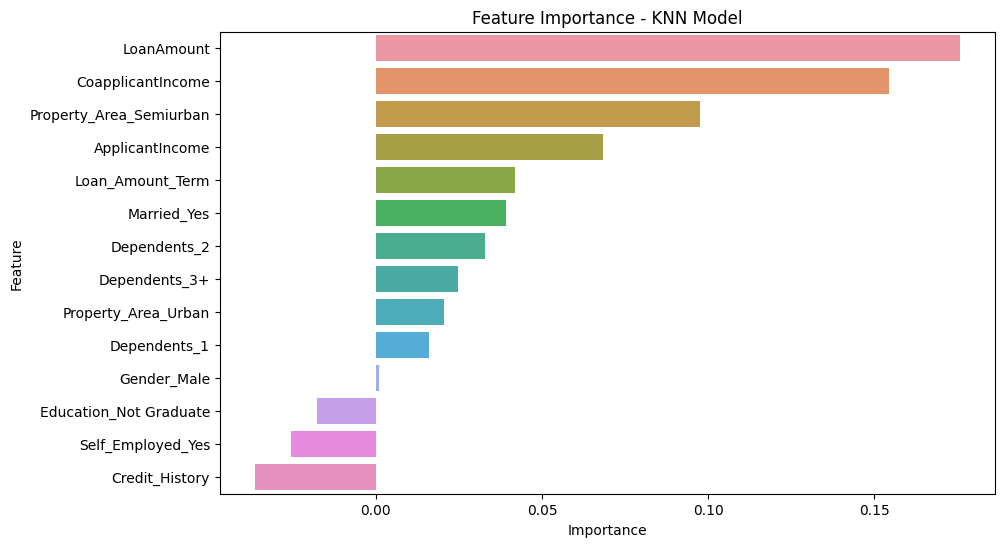

In [25]:
# Plot the feature importances for the KNN model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - KNN Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Conclusion

By considering the model performance and feature importances, the bank can gain insights into the predictive power of different models and identify areas of improvement in their loan approval process. They can focus on the most important features and refine their decision-making criteria to enhance accuracy and efficiency.

Additionally, it's important to note that feature importance analysis should be interpreted with caution, as it reflects the specific model used and may not generalize across different models or datasets. It is recommended to perform further analysis and domain expertise to validate the findings and make informed decisions.

Based on the insights from the feature importances, the bank can refine their loan approval process, give more weightage to important features, and potentially adjust their decision criteria to improve accuracy and efficiency in predicting loan approval outcomes.






To determine which model performed better for loan prediction, we need to compare the performance metrics of the KNN and Decision Tree models. Typically, the choice of the "better" model depends on the specific requirements and priorities of the bank. 

- Accuracy: Accuracy measures the overall correctness of the model's predictions. It is the ratio of correctly predicted loan approvals to the total number of predictions. A higher accuracy indicates a better-performing model. You can compare the accuracy scores of both models and choose the one with a higher accuracy.

- Precision: Precision measures the proportion of correctly predicted loan approvals out of the total predictions of loan approvals. It focuses on minimizing false positives, i.e., cases where the model incorrectly predicts loan approval. Higher precision indicates a lower rate of false positives.

- Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of actual loan approvals that are correctly predicted by the model. It focuses on minimizing false negatives, i.e., cases where the model incorrectly predicts loan rejection for applicants who should have been approved. Higher recall indicates a lower rate of false negatives.

- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, taking into account both false positives and false negatives. Higher F1-score indicates better overall performance.

Based on the evaluation metrics, we can analyze the performance of the models as follows:

- Accuracy: The KNN model achieved an accuracy of 0.77, while the Decision Tree model achieved an accuracy of 0.73. In terms of overall correctness, the KNN model performed slightly better.

- Precision: The KNN model had a precision of 0.88 for class N (rejected loans) and 0.76 for class Y (approved loans). The Decision Tree model had a precision of 0.53 for class N and 0.84 for class Y. In terms of minimizing false positives, the KNN model performed better for class N, while the Decision Tree model had higher precision for class Y.

- Recall: The KNN model achieved a recall of 0.25 for class N and 0.99 for class Y. The Decision Tree model had a recall of 0.64 for class N and 0.76 for class Y. The KNN model had higher recall for class Y, indicating it was better at capturing true positives.

- F1-score: The KNN model achieved an F1-score of 0.39 for class N and 0.86 for class Y. The Decision Tree model had an F1-score of 0.58 for class N and 0.80 for class Y. The KNN model had higher F1-scores for both classes.

Based on these evaluations, it can be concluded that the KNN model performs better in predicting loan approvals compared to the Decision Tree model. However, it's important to note that these conclusions are based on the specific dataset and evaluation metrics used. It is recommended to further validate the models on additional datasets and consider the specific requirements and priorities of the bank before making a final decision.